<a href="https://colab.research.google.com/github/RachelRamirez/misclassification_matrix/blob/main/Load_and_Analyze_Results_of_pkl_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Results

I have a lot of pickle files.  Let's see if I can load them all up and put in a csv format.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive/Con3"

path = "/content/drive/MyDrive/Con3/PreExperiment_PA_Shfl_40D_Lambda1_Lambda2_Lambda3/"

# file_name = "delete_later.pkl"

import pickle 
import numpy as np
import pandas as pd

import os

dir = path

dict_of_run_files = {}

count = 0
for file in os.listdir(path):
  if file.endswith(".pkl") and file.startswith("run"):
    # myfunction(file)
    with open(path + file, 'rb') as handle:
    # Call load method to deserialze
      dict_of_run_files[file] = pickle.load(handle)
      # list_of_files.extend(value for name, value in sorted(os.listdir(path)).items(), key=lambda item: item[0]) if name.startswith('run')
      count+=1 
      # print(unpickled_object == variable_to_be_deleted)
      # print(count, ". ", file, " was saved to dict_of_run_files. ")

      

How to get into the "dict_of_run_files" variable and dig out each of the contents we need in each pickle file.

We need at least the following information in a dataframe:

UniqueID | Date_Time |  Run | Rep | Lambda = (i,j,k) | Num of Epochs = (E1, E2, E3) | EarlyStop Patience = (P1, P2, P3) | Train/Val Accuracy | # of Misclassifications of [9t, 4p] | # Reverse Misclassifications | Final CM | Seed1 | Seed2 
-- | -- | --| --| --| --| --| --| -- | --| --| --| --
int | string | int | int | tuple | tuple | tuple | float | int | int | (1,100) (1,100), (1,100) | int | int





Unique ID can come later from just the order of the index or the key-name-of the file since each one has a unique last file_name.

Date_Time can come from the last part of the file name string, although in hind sight would have been nice to save to the admin key

Run really can't be a trusted Run Number anymore since I had some trouble with it, but can be cleaned up based off the lambda-epochs-patience values.

Rep is Rep specified in the Dictionary.



In [4]:
# dict_of_run_files.keys()
# An example of a key is 'run1_rep_1_w[9,4]_L_1_1_1_E_5_5_25_P_0_0_25__2023_03_09_1329_.pkl'

import pandas as pd
data = pd.DataFrame()

# I later had the great idea of adding an admin file so some files have it some don't.

count = 0
for file in os.listdir(path):
  if file.endswith(".pkl") and file.startswith("run"):
    # for key in dict_of_run_files.keys():
      try:
        dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]['admin']
      except:
        print(count, "No Admin Key")
        data[count] = [file, dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]]
      else:
      # for variable in list(("lambda1", "lambda2", "lambda3")):
      #   # print(variable)
        data[count] = [file, dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]]
      count+=1
# print(data.head)

data_transpose = data.transpose()
del(data)

# data_transpose.columns

# The try block lets you test a block of code for errors.
# The except block lets you handle the error.
# The else block lets you execute code when there is no error.
# The finally block lets you execute code, regardless of the result of the try- and except blocks.

# #This file does:
# print("Run:" , dict_of_run_files['run23_rep_1_w[9,4]_L_100_1_100_E_5_5_25_P_0_0_0__2023_03_09_1434_.pkl'][(23,1)]['admin']['run'])
# print("Rep:" , dict_of_run_files['run23_rep_1_w[9,4]_L_100_1_100_E_5_5_25_P_0_0_0__2023_03_09_1434_.pkl'][(23,1)]['admin']['rep'])

#so when filling in my dataframe with information I may need to use a for loop with an try-exception line.



0 No Admin Key


<ipython-input-4-c43dd81e961f>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[count] = [file, dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]]
<ipython-input-4-c43dd81e961f>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[count] = [file, dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]]
<ipython-input-4-c43dd81e961f>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

In [5]:
# # data_transpose[0] #the "0" is the first column which is now the filename
# data_transpose[1][0] #index 0 of column 1 is all the information saved from the pickle file, minus the "key". it still appears to be in dictionary format
# data_transpose[1][0]["First"]  # this is the "first" training phase history
data = pd.DataFrame()
data['categorical_accuracy'] = np.ones((2,2)).tolist()
data['val_categorical_accuracy'] =np.ones((2,2)).tolist()
data['loss'] = np.ones((2,2)).tolist()
data['val_loss'] = np.ones((2,2)).tolist()
data['4T_9P'] = np.ones((2,2)).tolist()
data['9T_4P'] =np.ones((2,2)).tolist()
data['3ConfusionMatrices'] =np.ones((2,2)).tolist()



# Create a list of columns for the data-frame Data where you can no longer subset into smaller keys
# list_of_columns_for_data = []
#gather all the unique keys in the many nested dictionary files to define a new dataframe with those columns
for row in range(0,len(data_transpose)):
  data.at[row, 'filename'] = data_transpose[0][row]
  for column in list(data_transpose[1][row].keys()):
    try:
      len(list(data_transpose[1][row][column].keys()))
    except AttributeError:
      # print(f'data_transpose[1][{row}][{column}] has no keys')
      # list_of_columns_for_data.append(column)
      if(column=='3ConfusionMatrices'):
        data.at[row, column] = pd.DataFrame([data_transpose[1][row][column].tolist()])
      else:
        data.at[row, column] = data_transpose[1][row][column]


    else:
      # print(f'data_transpose[1][{row}][{column}] has keys')

      for subcolumn in list(data_transpose[1][row][column].keys()):
        # list_of_columns_for_data.append(subcolumn)
        # print(f'key: subcolumn {subcolumn}')
        try:
          data.at[row, subcolumn] = data_transpose[1][row][column][subcolumn]
        except KeyError:
          # print("KeyError")
          data.at[row, subcolumn] = pd.DataFrame([data_transpose[1][row][column][subcolumn].tolist()])
        except TypeError:
          # print("TypeError")
          data.at[row, subcolumn] = pd.DataFrame([data_transpose[1][row][column][subcolumn].tolist()])
        except ValueError:  #categorical accuracy causes a value error because you can't set the dataframe value to an array
          # print("ValueError")
          data.at[row, subcolumn] = data_transpose[1][row][column][subcolumn]
        # data.at[row, subcolumn] = data_transpose[1][row][column][subcolumn]

        #I also want the last value listed in '4T_9P', '9P_4P', 'val_loss',  'val_categorical_accuracy',  'loss',  'val_loss',
        if(subcolumn == '4T_9P' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
          
        elif(subcolumn == '9T_4P' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])

        elif(subcolumn == 'val_loss' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
        elif(subcolumn == 'val_categorical_accuracy' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
        elif(subcolumn == 'loss' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
        elif(subcolumn == 'val_loss' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])

        # print(subcolumn)

# # data



# #Create a column with just the last confusion matrix, the last values of 9t_4p, and 4t_9p
# len(data['categorical_accuracy'][0])  #Column 'Categorical Accuracy', Row0, shows 35 values
# data['categorical_accuracy'][0][-1]
# data['val_categorical_accuracy'][0][-1]
# len(data['9T_4P'][0])  #The array of values for '9T_4P' is length 35, and the last value is 12 
# data['9T_4P'][0][-1]  # to get the last value for row 0
 


# data.drop_duplicates(subset=['3ConfusionMatrices'][0]) #fails TypeError 'unhashable type: numpy.ndarray'
# https://stackoverflow.com/questions/43855462/pandas-drop-duplicates-method-not-working-on-dataframe-containing-lists

data = data.drop(columns=['filename', '3ConfusionMatrices', 'First', 'Second', 'Third'])
 
data = data.loc[data.astype(str).drop_duplicates().index]

data = data.loc[data.dropna().index]


# ## So I don't have to do the above steps anymore
# data_csv = data.to_csv("data.csv")
  
# from google.colab import files
# files.download('data.csv')


In [33]:
data.tail()
# data['lambdacombo']

,categorical_accuracy,val_categorical_accuracy,loss,val_loss,4T_9P,9T_4P,val_categorical_accuracy_last_value,val_categorical_accuracy_length,loss_last_value,loss_length,...,lambda3,epochs1,epochs2,epochs3,es1,es2,es3,tf.keras.utils.set_random_seed,OS environment python hash seed value,lambdacombo
775,"[0.7664333581924438, 0.8885166645050049, 0.907...","[0.9078666567802429, 0.9254666566848755, 0.936...","[0.755667507648468, 0.3818039000034332, 0.3149...","[0.31485801935195923, 0.24618779122829437, 0.2...","[47, 23, 16, 21, 14, 15, 19, 13, 14, 8, 13, 11...","[26, 33, 36, 17, 29, 24, 9, 14, 13, 20, 17, 10...",0.965333,35.0,0.130822,35.0,...,1.0,5.0,5.0,25.0,0.0,0.0,0.0,342.0,56.0,NaN
776,"[0.7664333581924438, 0.8885166645050049, 0.907...","[0.9078666567802429, 0.9254666566848755, 0.936...","[0.755667507648468, 0.3818039000034332, 0.3149...","[0.31485801935195923, 0.24618779122829437, 0.2...","[47, 23, 16, 21, 14, 15, 19, 13, 14, 8, 13, 11...","[26, 33, 36, 17, 29, 24, 9, 14, 13, 20, 17, 10...",0.965333,35.0,0.130822,35.0,...,1.0,5.0,5.0,25.0,0.0,0.0,0.0,342.0,56.0,NaN
777,"[0.7664333581924438, 0.8885166645050049, 0.907...","[0.9078666567802429, 0.9254666566848755, 0.936...","[0.755667507648468, 0.3818039000034332, 0.3149...","[0.31485801935195923, 0.24618779122829437, 0.2...","[47, 23, 16, 21, 14, 15, 19, 13, 14, 8, 13, 11...","[26, 33, 36, 17, 29, 24, 9, 14, 13, 20, 17, 10...",0.965333,35.0,0.130822,35.0,...,1.0,5.0,5.0,25.0,0.0,0.0,0.0,342.0,56.0,NaN
778,"[0.7664333581924438, 0.8885166645050049, 0.907...","[0.9078666567802429, 0.9254666566848755, 0.936...","[0.755667507648468, 0.3818039000034332, 0.3149...","[0.31485801935195923, 0.24618779122829437, 0.2...","[47, 23, 16, 21, 14, 15, 19, 13, 14, 8, 13, 11...","[26, 33, 36, 17, 29, 24, 9, 14, 13, 20, 17, 10...",0.965333,35.0,0.130822,35.0,...,1.0,5.0,5.0,25.0,0.0,0.0,0.0,342.0,56.0,NaN
779,"[0.7664333581924438, 0.8885166645050049, 0.907...","[0.9078666567802429, 0.9254666566848755, 0.936...","[0.755667507648468, 0.3818039000034332, 0.3149...","[0.31485801935195923, 0.24618779122829437, 0.2...","[47, 23, 16, 21, 14, 15, 19, 13, 14, 8, 13, 11...","[26, 33, 36, 17, 29, 24, 9, 14, 13, 20, 17, 10...",0.965333,35.0,0.130822,35.0,...,1.0,5.0,5.0,25.0,0.0,0.0,0.0,342.0,56.0,NaN


In [41]:
# I need to add LAmbda Combo
for i, row in data.iterrows():
  # print(i )
  try:
    data.loc[i, 'lambdacombo'] = str(int(data.loc[i, 'lambda1'])) +"-"+ str(int(data.loc[i, 'lambda2'])) +"-"+ str(int(data.loc[i, 'lambda3']))
  except ValueError:
    data.loc[i, 'lambdacombo'] = str((data.loc[i, 'lambda1'])) +"-"+ str((data.loc[i, 'lambda2'])) +"-"+ str((data.loc[i, 'lambda3']))                               
  except KeyError:
    print('KeyError at i', i)
 

In [43]:
data.head()
data['lambdacombo']

1          1-1-1
2          1-1-1
3          1-1-1
4        100-1-1
5      100-1-100
         ...    
775        1-1-1
776        1-1-1
777        1-1-1
778        1-1-1
779        1-1-1
Name: lambdacombo, Length: 312, dtype: object

In [61]:
#Sort the dataframe by Lambda1 Value

data.sort_values(by=['lambdacombo'], inplace=True, ascending=True)
data['lambdacombo'].unique()

df111       = data[data['lambdacombo']=='1-1-1']
df11100     = data[data['lambdacombo']=='1-1-100']
df111000    = data[data['lambdacombo']=='1-1-1000']
df11001     = data[data['lambdacombo']== '1-100-1']
df1100100   = data[data['lambdacombo']=='1-100-100']
df11001000  = data[data['lambdacombo']=='1-100-1000']
df110001    = data[data['lambdacombo']=='1-1000-1']
df11000100  = data[data['lambdacombo']=='1-1000-100']
df110001000 = data[data['lambdacombo']== '1-1000-1000']

list_of_df_lambda1 = (df111, df11100, df111000, df11001, df1100100, df11001000, df110001, df11000100, df110001000)
# Create a list of dataframes
dataframes = list_of_df_lambda1 


# Get the first row index of each dataframe
first_row_indexes = [df.index[0] for df in dataframes]

first_row_indexes


[1, 28, 54, 491, 34, 105, 14, 108, 110]

At this point, 4/12/2023, I come back to this old file, I want to plot all the loss values and label them with the Lambda-Lambda-Lambda Combination, or at least save them so I can plot them easily somewhere else.

>  I'm currently having trouble with the coloring



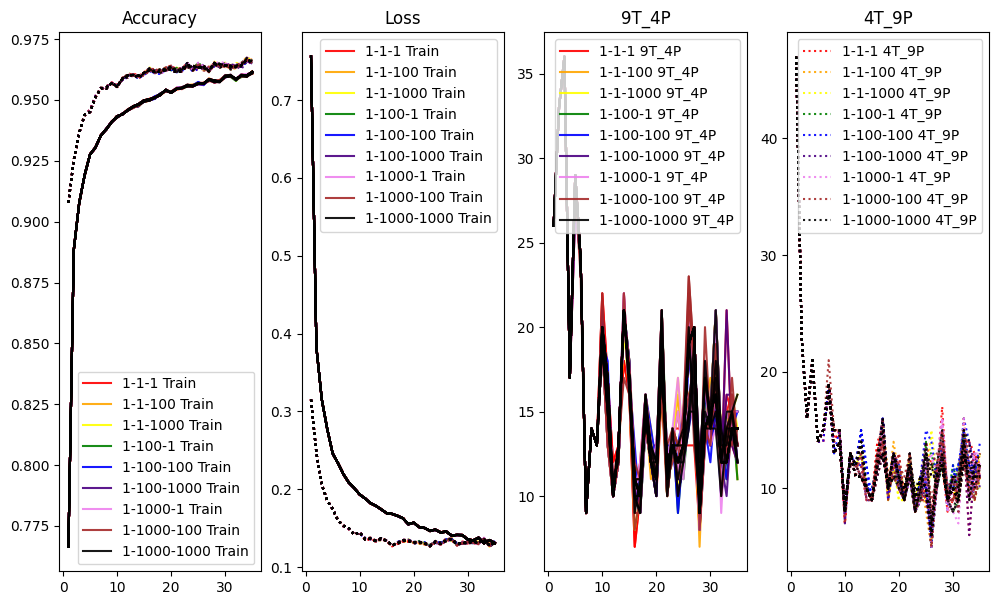

In [80]:
import matplotlib.pyplot as plt 

# 	categorical_accuracy	val_categorical_accuracy	loss	val_loss 

# Setup figure and axes 
fig, ax = plt.subplots(1,4,figsize=(12,7))
colors = ["Red", "Orange", "Yellow", "Green", "Blue", "Indigo", "Violet", "Brown", "Black"]

# for df, color, label in zip(list_of_df_lambda1, ['blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green'],[1,100,1000, 1,100,1000, 1,100,1000] ):

for df, color in zip(list_of_df_lambda1, colors):

  # print("color", color)
  # train_acc = df['categorical_accuracy']
  # valid_acc = df['val_categorical_accuracy']

  for i, row in df.iterrows():
    # print(i, end=" ")  #I did this to find out which row was first for each dataframe so I could plot just one Label

    label=row['lambdacombo']

    if i in first_row_indexes:
      # print(i)
        ax[0].plot(range(1, len(row['categorical_accuracy'])+1),     row['categorical_accuracy'],      color=color,    label=str(label)+" Train",         alpha=.9  )
        ax[0].plot(range(1, len(row['val_categorical_accuracy'])+1), row['val_categorical_accuracy'],  color=color,             alpha=.9,  linestyle=':' )
        ax[0].set_title('Accuracy')
        ax[0].legend()


        ax[1].plot(range(1, len(row['loss'])+1),      row['loss'],                                           color=color,   label=str(label)+' Train', alpha=.9)
        ax[1].plot(range(1, len(row['val_loss'])+1),  row['val_loss'],                                    color=color,    alpha=.9 ,  linestyle=':' )
        ax[1].set_title('Loss')
        ax[1].legend()


        ax[2].plot(range(1, len(row['9T_4P'])+1),     row['9T_4P'],      color=color,    label=str(label)+' 9T_4P',         alpha=.9 )
        ax[3].plot(range(1, len(row['4T_9P'])+1),     row['4T_9P'],          color=color,    label=str(label)+' 4T_9P',         alpha=.9, linestyle=':' )
        ax[2].set_title('9T_4P')
        ax[3].set_title('4T_9P')
        ax[2].legend()
        ax[3].legend()


    else:
      # label=""
      ax[0].plot(range(1, len(row['categorical_accuracy'])+1),     row['categorical_accuracy'],      color=color,       alpha=.9  )
      ax[0].plot(range(1, len(row['val_categorical_accuracy'])+1), row['val_categorical_accuracy'],  color=color,          alpha=.9,  linestyle=':' )
  

      ax[1].plot(range(1, len(row['loss'])+1),      row['loss'],                                           color=color,    alpha=.9)
      ax[1].plot(range(1, len(row['val_loss'])+1),  row['val_loss'],                                    color=color,    alpha=.9 ,  linestyle=':' )
  

      ax[2].plot(range(1, len(row['9T_4P'])+1),     row['9T_4P'],      color=color,        alpha=.9 )
      ax[3].plot(range(1, len(row['4T_9P'])+1),     row['4T_9P'],          color=color,           alpha=.9, linestyle=':' )
  
    

    # plt.scatter(x_axis, train_acc[i], c=np.repeat(lambda1_value[i],len(x_axis)), cmap=cmap, label='Training Acc') 
    # plt.scatter(x_axis, valid_acc[i],c=np.repeat(lambda1_value[i],len(x_axis)), cmap=cmap,  label='Validation Acc', linestyle=':') 

  # plt.scatter(x_axis, train_acc[i], color=color, marker='o'  , label='Training Acc') 
  # plt.scatter(x_axis, valid_acc[i], color=color, marker='x',  label='Validation Acc', linestyle=':') 



# plt.legend() 

# plt.colorbar()
plt.show() 


 

In [81]:
#Sort the dataframe by Lambda1 Value

data.sort_values(by=['lambdacombo'], inplace=True, ascending=True)
data['lambdacombo'].unique()

df10011       = data[data['lambdacombo']=='100-1-1']
df1001100     = data[data['lambdacombo']=='100-1-100']
df10011000    = data[data['lambdacombo']=='100-1-1000']
df1001001     = data[data['lambdacombo']== '100-100-1']
df100100100   = data[data['lambdacombo']=='100-100-100']
df1001001000  = data[data['lambdacombo']=='100-100-1000']
df10010001    = data[data['lambdacombo']=='100-1000-1']
df1001000100  = data[data['lambdacombo']=='100-1000-100']
df10010001000 = data[data['lambdacombo']== '100-1000-1000']

list_of_df_lambda100 = (df10011, df1001100    , df10011000  , df1001001      , df100100100  , df1001001000 , df10010001   , df1001000100  , df10010001000 )
# Create a list of dataframes
dataframes = list_of_df_lambda100 


# Get the first row index of each dataframe
first_row_indexes = [df.index[0] for df in dataframes]

first_row_indexes


[112, 46, 47, 535, 539, 542, 550, 126, 129]

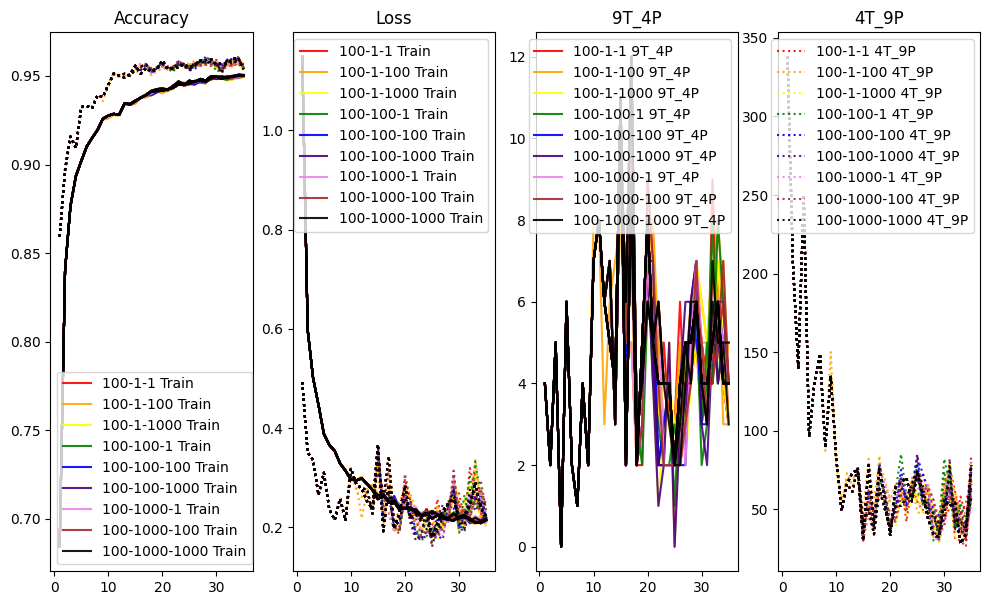

In [83]:
import matplotlib.pyplot as plt 

# 	categorical_accuracy	val_categorical_accuracy	loss	val_loss 

# Setup figure and axes 
fig, ax = plt.subplots(1,4,figsize=(12,7))
colors = ["Red", "Orange", "Yellow", "Green", "Blue", "Indigo", "Violet", "Brown", "Black"]

# for df, color, label in zip(list_of_df_lambda1, ['blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green'],[1,100,1000, 1,100,1000, 1,100,1000] ):

for df, color in zip(list_of_df_lambda100, colors):

  # print("color", color)
  # train_acc = df['categorical_accuracy']
  # valid_acc = df['val_categorical_accuracy']

  for i, row in df.iterrows():
    # print(i, end=" ")  #I did this to find out which row was first for each dataframe so I could plot just one Label

    label=row['lambdacombo']

    if i in first_row_indexes:
      # print(i)
        ax[0].plot(range(1, len(row['categorical_accuracy'])+1),     row['categorical_accuracy'],      color=color,    label=str(label)+" Train",         alpha=.9  )
        ax[0].plot(range(1, len(row['val_categorical_accuracy'])+1), row['val_categorical_accuracy'],  color=color,             alpha=.9,  linestyle=':' )
        ax[0].set_title('Accuracy')
        ax[0].legend()


        ax[1].plot(range(1, len(row['loss'])+1),      row['loss'],                                           color=color,   label=str(label)+' Train', alpha=.9)
        ax[1].plot(range(1, len(row['val_loss'])+1),  row['val_loss'],                                    color=color,    alpha=.9 ,  linestyle=':' )
        ax[1].set_title('Loss')
        ax[1].legend()


        ax[2].plot(range(1, len(row['9T_4P'])+1),     row['9T_4P'],      color=color,    label=str(label)+' 9T_4P',         alpha=.9 )
        ax[3].plot(range(1, len(row['4T_9P'])+1),     row['4T_9P'],          color=color,    label=str(label)+' 4T_9P',         alpha=.9, linestyle=':' )
        ax[2].set_title('9T_4P')
        ax[3].set_title('4T_9P')
        ax[2].legend()
        ax[3].legend()


    else:
      # label=""
      ax[0].plot(range(1, len(row['categorical_accuracy'])+1),     row['categorical_accuracy'],      color=color,       alpha=.9  )
      ax[0].plot(range(1, len(row['val_categorical_accuracy'])+1), row['val_categorical_accuracy'],  color=color,          alpha=.9,  linestyle=':' )
  

      ax[1].plot(range(1, len(row['loss'])+1),      row['loss'],                                           color=color,    alpha=.9)
      ax[1].plot(range(1, len(row['val_loss'])+1),  row['val_loss'],                                    color=color,    alpha=.9 ,  linestyle=':' )
  

      ax[2].plot(range(1, len(row['9T_4P'])+1),     row['9T_4P'],      color=color,        alpha=.9 )
      ax[3].plot(range(1, len(row['4T_9P'])+1),     row['4T_9P'],          color=color,           alpha=.9,  )
  
    

    # plt.scatter(x_axis, train_acc[i], c=np.repeat(lambda1_value[i],len(x_axis)), cmap=cmap, label='Training Acc') 
    # plt.scatter(x_axis, valid_acc[i],c=np.repeat(lambda1_value[i],len(x_axis)), cmap=cmap,  label='Validation Acc', linestyle=':') 

  # plt.scatter(x_axis, train_acc[i], color=color, marker='o'  , label='Training Acc') 
  # plt.scatter(x_axis, valid_acc[i], color=color, marker='x',  label='Validation Acc', linestyle=':') 



# plt.legend() 

# plt.colorbar()
plt.show() 


 

In [85]:
#Sort the dataframe by Lambda1 Value

data.sort_values(by=['lambdacombo'], inplace=True, ascending=True)
data['lambdacombo'].unique()

df100011       = data[data['lambdacombo']=='1000-1-1']
df10001100     = data[data['lambdacombo']=='1000-1-100']
df100011000    = data[data['lambdacombo']=='1000-1-1000']
df10001001     = data[data['lambdacombo']== '1000-100-1']
df1000100100   = data[data['lambdacombo']=='1000-100-100']
df10001001000  = data[data['lambdacombo']=='1000-100-1000']
df100010001    = data[data['lambdacombo']=='1000-1000-1']
df10001000100  = data[data['lambdacombo']=='1000-1000-100']
df100010001000 = data[data['lambdacombo']== '1000-1000-1000']

list_of_df_lambda1000 = (df100011, df10001100    , df100011000  , df10001001      , df1000100100  , df10001001000 , df100010001   , df10001000100  , df100010001000 )
# Create a list of dataframes
dataframes = list_of_df_lambda1000


# Get the first row index of each dataframe
first_row_indexes = [df.index[0] for df in dataframes]

first_row_indexes


[563, 89, 134, 136, 586, 590, 142, 145, 602]

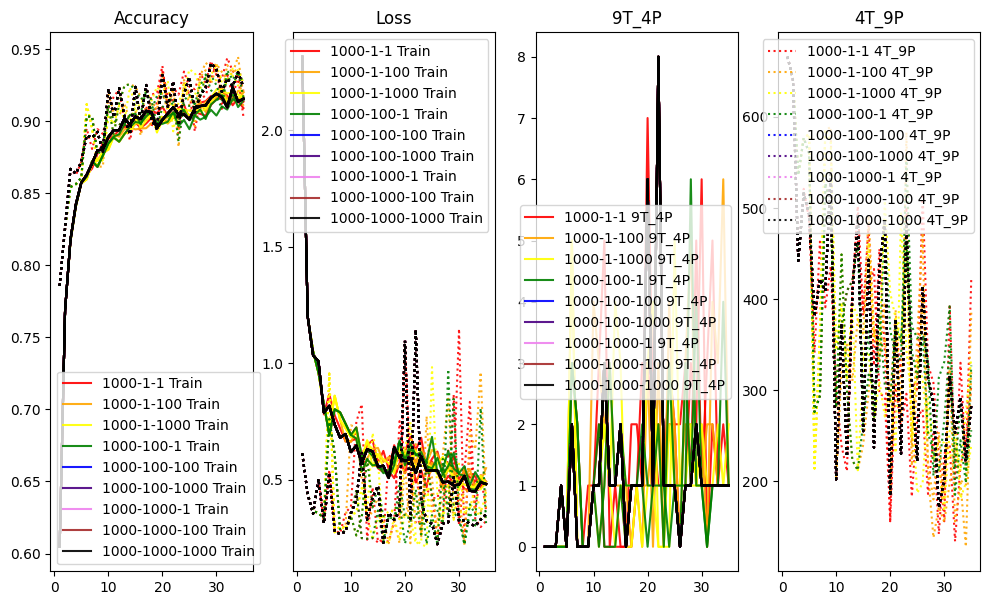

In [88]:
import matplotlib.pyplot as plt 

# 	categorical_accuracy	val_categorical_accuracy	loss	val_loss 

# Setup figure and axes 
fig, ax = plt.subplots(1,4,figsize=(12,7))
colors = ["Red", "Orange", "Yellow", "Green", "Blue", "Indigo", "Violet", "Brown", "Black"]

# for df, color, label in zip(list_of_df_lambda1, ['blue', 'orange', 'green', 'blue', 'orange', 'green', 'blue', 'orange', 'green'],[1,100,1000, 1,100,1000, 1,100,1000] ):

for df, color in zip(list_of_df_lambda1000, colors):

  # print("color", color)
  # train_acc = df['categorical_accuracy']
  # valid_acc = df['val_categorical_accuracy']

  for i, row in df.iterrows():
    # print(i, end=" ")  #I did this to find out which row was first for each dataframe so I could plot just one Label

    label=row['lambdacombo']

    if i in first_row_indexes:
      # print(i)
        ax[0].plot(range(1, len(row['categorical_accuracy'])+1),     row['categorical_accuracy'],      color=color,    label=str(label)+" Train",         alpha=.9  )
        ax[0].plot(range(1, len(row['val_categorical_accuracy'])+1), row['val_categorical_accuracy'],  color=color,             alpha=.9,  linestyle=':' )
        ax[0].set_title('Accuracy')
        ax[0].legend()


        ax[1].plot(range(1, len(row['loss'])+1),      row['loss'],                                           color=color,   label=str(label)+' Train', alpha=.9)
        ax[1].plot(range(1, len(row['val_loss'])+1),  row['val_loss'],                                    color=color,    alpha=.9 ,  linestyle=':' )
        ax[1].set_title('Loss')
        ax[1].legend()


        ax[2].plot(range(1, len(row['9T_4P'])+1),     row['9T_4P'],      color=color,    label=str(label)+' 9T_4P',         alpha=.9 )
        ax[3].plot(range(1, len(row['4T_9P'])+1),     row['4T_9P'],          color=color,    label=str(label)+' 4T_9P',         alpha=.9, linestyle=':' )
        ax[2].set_title('9T_4P')
        ax[3].set_title('4T_9P')
        ax[2].legend()
        ax[3].legend()


    else:
      # label=""
      ax[0].plot(range(1, len(row['categorical_accuracy'])+1),     row['categorical_accuracy'],      color=color,       alpha=.9  )
      ax[0].plot(range(1, len(row['val_categorical_accuracy'])+1), row['val_categorical_accuracy'],  color=color,          alpha=.9,  linestyle=':' )
  

      ax[1].plot(range(1, len(row['loss'])+1),      row['loss'],                                           color=color,    alpha=.9)
      ax[1].plot(range(1, len(row['val_loss'])+1),  row['val_loss'],                                    color=color,    alpha=.9 ,  linestyle=':' )
  

      ax[2].plot(range(1, len(row['9T_4P'])+1),     row['9T_4P'],      color=color,        alpha=.9 )
      ax[3].plot(range(1, len(row['4T_9P'])+1),     row['4T_9P'],          color=color,           alpha=.9,)
  
    

    # plt.scatter(x_axis, train_acc[i], c=np.repeat(lambda1_value[i],len(x_axis)), cmap=cmap, label='Training Acc') 
    # plt.scatter(x_axis, valid_acc[i],c=np.repeat(lambda1_value[i],len(x_axis)), cmap=cmap,  label='Validation Acc', linestyle=':') 

  # plt.scatter(x_axis, train_acc[i], color=color, marker='o'  , label='Training Acc') 
  # plt.scatter(x_axis, valid_acc[i], color=color, marker='x',  label='Validation Acc', linestyle=':') 



# plt.legend() 

# plt.colorbar()
plt.show() 


 

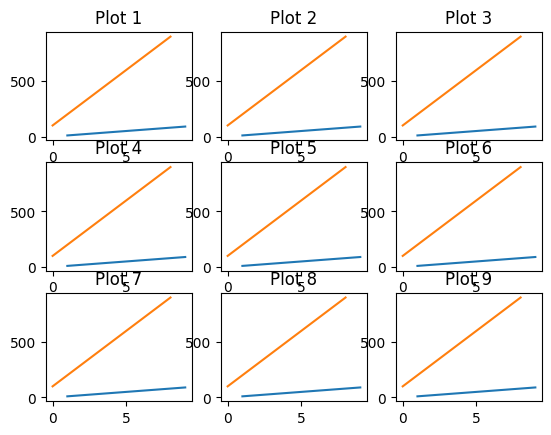

In [53]:
# Give detailed example on how to do a 3x3 subplots and use  a for-loop to graph 3 datasets on each :

import matplotlib.pyplot as plt

# Create figure with 3x3 subplots using matplotlib.pyplot
fig, ax = plt.subplots(3, 3)

# Create 3 datasets
data_1 = [1,2,3,4,5,6,7,8,9]
data_2 = [10,20,30,40,50,60,70,80,90]
data_3 = [100,200,300,400,500,600,700,800,900]

# Create a for loop to iterate through the datasets
for i, ax in enumerate(fig.axes):
    ax.plot(data_1, data_2, data_3) # Plot each dataset on the subplot
    ax.set_title("Plot {}".format(i+1)) # Set the title for each subplot

# Show the plot
plt.show()

In [82]:
# import pandas as pd
# data_to_save = pd.DataFrame()
# data= pd.read_csv('data.csv')

data_to_save = data[['lambda1',	'lambda2',	'lambda3',	'epochs1',	'epochs2',	'epochs3',	'es1',	'es2',	'es3',
                     '9T_4P_last_value',	'4T_9P_last_value', 'val_categorical_accuracy_last_value', 'categorical_accuracy',	'val_categorical_accuracy',	
                     'loss',	'val_loss', '9T_4P', '4T_9P']].copy()

for row in range(len(data_to_save)):
  # print(row)
  try:
    data_to_save.loc[row, 'lambdacombo'] = str(int(data_to_save.loc[row, 'lambda1'])) +"-"+ str(int(data_to_save.loc[row, 'lambda2'])) +"-"+ str(int(data_to_save.loc[row, 'lambda3']))
  except ValueError:
    data_to_save.loc[row, 'lambdacombo'] = str((data_to_save.loc[row, 'lambda1'])) +"-"+ str((data_to_save.loc[row, 'lambda2'])) +"-"+ str((data_to_save.loc[row, 'lambda3']))                               

data_to_save['lambdacombo'].value_counts()
data_csv = data_to_save.to_csv("data.csv")

np.asarray(data['categorical_accuracy'][0])
np.asarray(data_to_save['categorical_accuracy'][0])
# from google.colab import files
# files.download('data.csv')

'[0.76643336 0.88851666 0.9077     0.91909999 0.92760003 0.93046665\n 0.93540001 0.93783331 0.94090003 0.94278336 0.94438332 0.94564998\n 0.94698334 0.94798332 0.94971669 0.94988334 0.95134997 0.95228332\n 0.95368332 0.95321667 0.95488334 0.95441669 0.95574999 0.95576668\n 0.95660001 0.9569     0.95821667 0.95741665 0.95783335 0.95971668\n 0.95998335 0.95803332 0.96011668 0.96013331 0.96069998]'

In [48]:
# import pandas as pd
# data_to_save = pd.read_csv('data.csv')

#### LambdaCombo Variable Column

"LambdaCombo" is a column to make all three-phases into a unique string value, so that the 27-unique combos can be easily identified.  These are the unique "runs".  I can't trust that each run is numbered to identify the lambdas correctly, so I use the lambda-combo columns. 

In [49]:
data_to_save.head()
data_to_save.lambdacombo.value_counts()
data_to_save.lambdacombo.value_counts().index

Index(['1-1-1', '100-1-1', '100-1-100', '1-1-100', '1-1-1000', '1-100-1',
       '1-100-100', '1-100-1000', '1-1000-1', '1-1000-100', '100-1-1000',
       '1-1000-1000', '100-100-100', '100-100-1', '100-100-1000', '100-1000-1',
       '100-1000-100', '100-1000-1000', '1000-1-1', '1000-1-100',
       '1000-1-1000', '1000-100-1', '1000-1000-1000', '1000-100-100',
       '1000-100-1000', '1000-1000-1', '1000-1000-100'],
      dtype='object')

The dependent variable of interest is the misclassifications of highest occurence, which in originally running the "lousy" neural network of 40 dense connections was misidentifying a 9 as a 4.  Because after 30 runs of just baseline costs (1-1-1) this was the highest misclassification, this became the objective to minimize in creating higher and higher costs for misclassifying a 9 as a 4.  This could also be called the most "hard" classification, since it was naturally the most occuring. The dataframe of saved data is sorted by the misclassification rate to enable easier viewing of groups in the following graph 

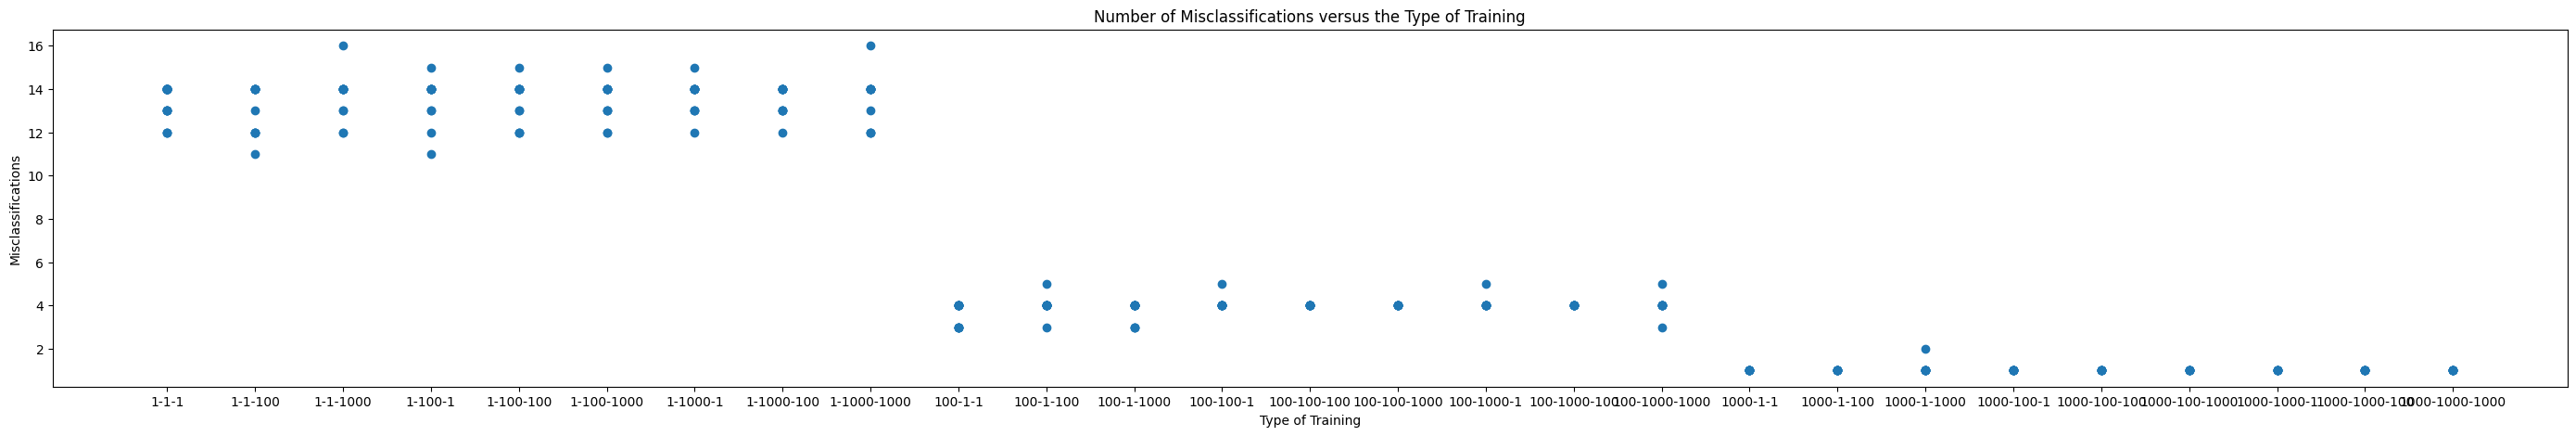

In [50]:
# importing the required module
import matplotlib.pyplot as plt

# data_to_save.sort_values('9T_4P_last_value', inplace=True)
data_to_save.sort_values('lambdacombo', inplace=True)

# # x axis values
x = data_to_save['lambdacombo']
# corresponding y axis values
y = data_to_save['9T_4P_last_value']

plt.figure(figsize=(35,5))
# plotting the points 
plt.scatter(x, y)
  
# naming the x axis
plt.xlabel('Type of Training')
# naming the y axis
plt.ylabel('Misclassifications')
  
# giving a title to my graph
plt.title('Number of Misclassifications versus the Type of Training')
  
# function to show the plot
plt.show() 

We can see that the lowest misclassifications happen with the highest-cost of misclassification in the first phase.   These average around 2.   The next group of misclassifications happens around when the cost of misclassification is '100' in the first phase.  And finally the last group of misclassifications, which is the highest overall, is in the cost of misclassifications that are '1' in the initial phase.  It doesn't apppear that the second phase makes a large difference overall in any of the groups.  For example 1-1-1, which is a constant rate of '1' cost seems to have the same results   as other runs where the second phase was 1000.

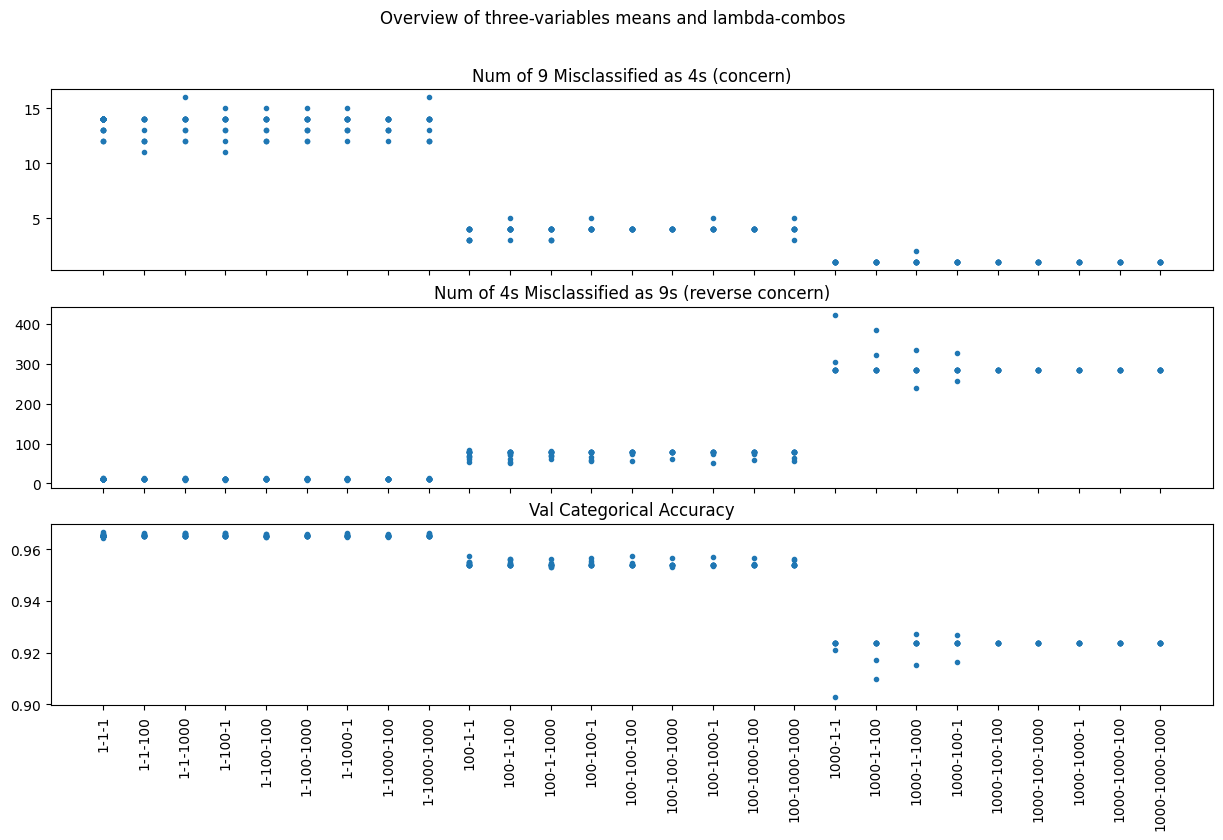

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,8), sharex=True)
fig.suptitle('Overview of three-variables means and lambda-combos')
plt.xticks(rotation=90)
  
# ax1.scatter(x, y1, c = "b", marker='^')
ax1.scatter(data_to_save['lambdacombo'], data_to_save['9T_4P_last_value'], marker='.')
ax1.set_title('Num of 9 Misclassified as 4s (concern)')

# ax2.scatter(x, y2, c="orange")
ax2.set_title('Num of 4s Misclassified as 9s (reverse concern)')
ax2.scatter(data_to_save['lambdacombo'], data_to_save['4T_9P_last_value'], marker='.')
 
# ax3.scatter(x, y3, c='green')
ax3.scatter(data_to_save['lambdacombo'], data_to_save['val_categorical_accuracy_last_value'], marker='.')
ax3.set_title('Val Categorical Accuracy')

ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)
  

A look at the above data with just the averages is below.  You can visually see there are no real differences between the averages for each inital phase of the data.

<ipython-input-52-e087979a0838>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_combo_summary = data_to_save.groupby('lambdacombo')['9T_4P_last_value','val_categorical_accuracy_last_value', '4T_9P_last_value'].mean()


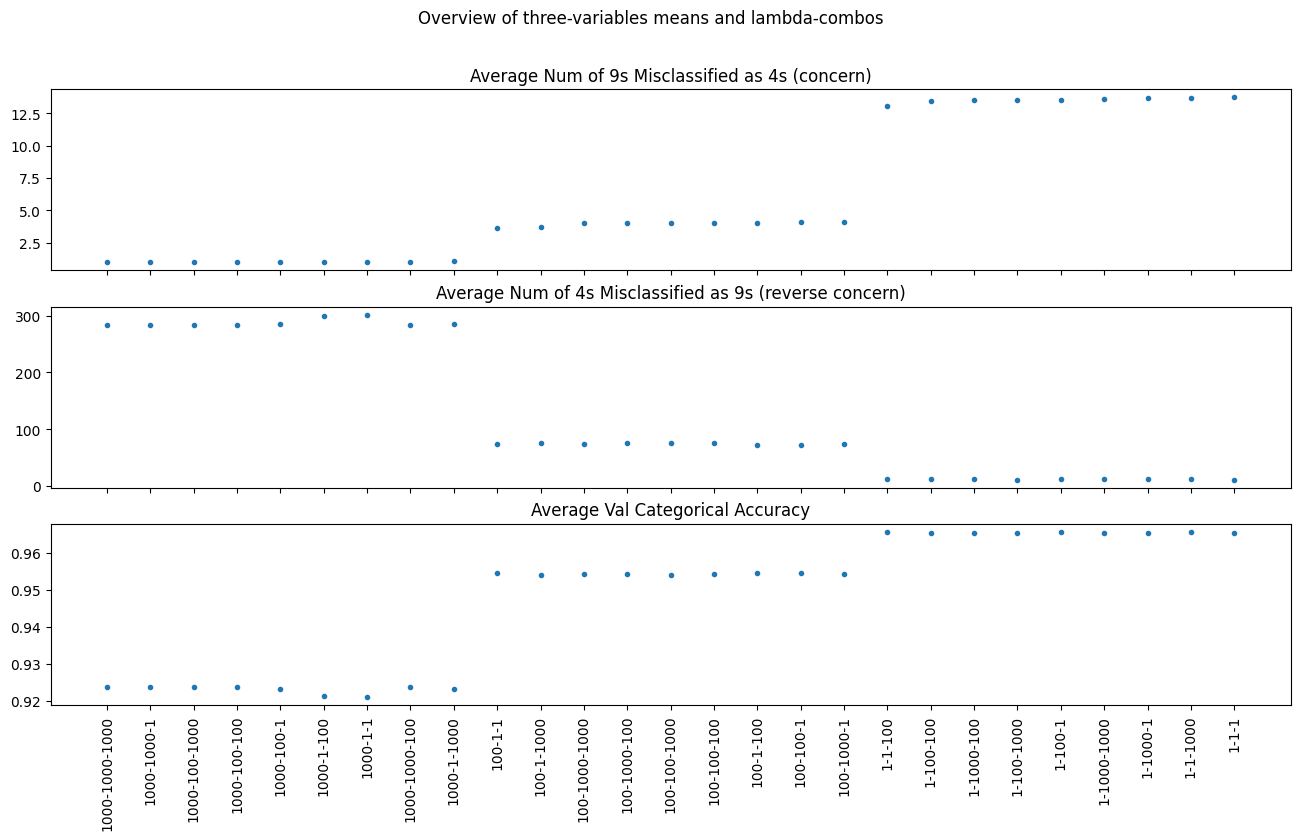

In [52]:
# data_to_save.groupby('lambdacombo')['9T_4P_last_value','val_categorical_accuracy_last_value'].describe()
data_combo_summary = data_to_save.groupby('lambdacombo')['9T_4P_last_value','val_categorical_accuracy_last_value', '4T_9P_last_value'].mean()
data_combo_summary.sort_values('9T_4P_last_value', inplace=True)

# # x axis values
x = data_combo_summary.index

# corresponding y axis values
y1 = data_combo_summary['9T_4P_last_value']
y2 = data_combo_summary['4T_9P_last_value']
y3 = data_combo_summary['val_categorical_accuracy_last_value']

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(16,8), sharex=True)
fig.suptitle('Overview of three-variables means and lambda-combos')
plt.xticks(rotation=90)
  
# ax1.scatter(x, y1, c = "b", marker='^')
ax1.scatter(x, y1, marker='.')
ax1.set_title('Average Num of 9s Misclassified as 4s (concern)')

# ax2.scatter(x, y2, c="orange")
ax2.set_title('Average Num of 4s Misclassified as 9s (reverse concern)')
ax2.scatter(x, y2, marker='.')
 
# ax3.scatter(x, y3, c='green')
ax3.scatter(x,y3, marker='.')
ax3.set_title('Average Val Categorical Accuracy')

ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)
  

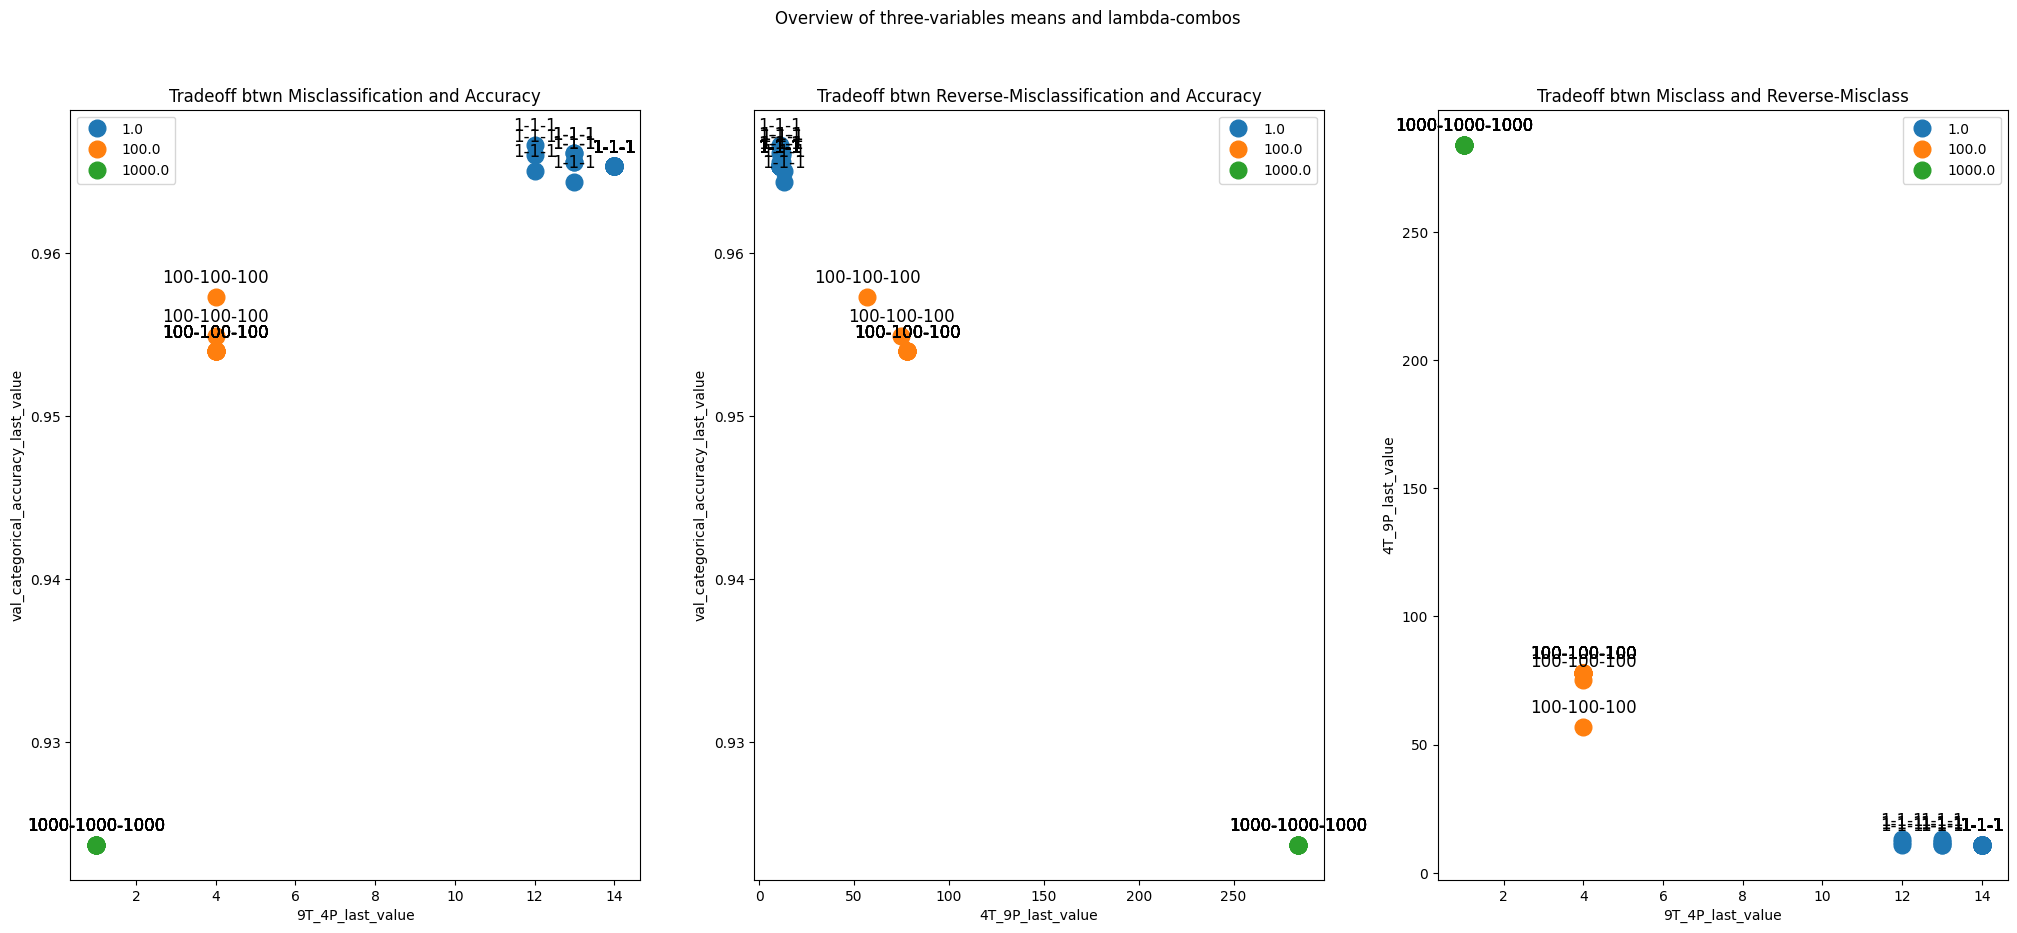

In [53]:
# from pandas.core.ops import rand_
import numpy as np

## Now to change this to the Tradeoff Graphs I made but somehow didn't save =O
data_to_save.sort_values('lambdacombo', inplace=True, ignore_index=True)

# groups = data_to_save.groupby('lambdacombo')

def narrow_data(i):
    # Define narrow area of dataframe to graph based off "i" the phase-1 value
    df = data_to_save.where(data_to_save['lambda1']==i).dropna()
    df = df.where(data_to_save['lambda2']==i).dropna()
    df = df.where(data_to_save['lambda3']==i).dropna()
    return df

def plot_data(df, x,y,ax, lambdas, title):
  # ax.scatter(x,y, marker='.', )
  # original_lambda_combo_string = 'nan-nan-nan'

  for j in (df[lambdas].index):
      # print("j:", j)
      # colors = ['black', 'orange', 'blue']
      # df = data_to_save.where(data_to_save['lambda1']==i).dropna()
      # print("df[x][j]:", df[x][j], )
      # print("df[y][j]:", df[y][j], )
      # print("df['lambda2'][j]:", df['lambda2'][j], )
      # print("annotate text:", str(df[lambdas][j]))

      # ax.scatter(df[x][j]+0*np.random.random(), df[y][j], marker='.', c=df['lambda2'][j]) 
      ax.annotate(text=str(df[lambdas][j]),  xy=(df[x][j], df[y][j]), textcoords="offset points", 
                  xytext=(0+0*np.random.randint(-10,10),10+0*np.random.randint(-10,10)), 
                  ha='center', size=12)
      # original_lambda_combo_string = lambdas[j]
      ax.set_xlabel(str(x))
      ax.set_ylabel(str(y))


  


  groups = df.groupby('lambda2')
  for name, group in groups:
    # print('name: ', name, 'group: ' , group)  
    ax.plot(group[x], group[y], marker='o', linestyle='', markersize=12, label=name)
  ax.set_title(title)
  ax.legend()


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,10))
fig.suptitle('Overview of three-variables means and lambda-combos')
# plt.xticks(rotation=90)

list_of_phase_1_values = [1, 100, 1000]
# list_of_phase_1_values = [1]

for i in (list_of_phase_1_values):
  df = narrow_data(i=i)
  plot_data(df=df , x='9T_4P_last_value', y='val_categorical_accuracy_last_value', ax=ax1, lambdas='lambdacombo', title='Tradeoff btwn Misclassification and Accuracy')
  plot_data(df=df, x='4T_9P_last_value',y='val_categorical_accuracy_last_value',ax=ax2, lambdas='lambdacombo', title='Tradeoff btwn Reverse-Misclassification and Accuracy')
  plot_data(df=df, x='9T_4P_last_value',y='4T_9P_last_value',ax=ax3, lambdas='lambdacombo', title='Tradeoff btwn Misclass and Reverse-Misclass')

 

It doesn't seem to matter what you do in the middle or later phases according to this experiment.   So more to follow is to see if there is a difference with middle and late phase training.  Sequential testing in JMP does show that lambda1 is most significant.  Now what?

In [87]:
import matplotlib.pyplot as plt 

# 	categorical_accuracy	val_categorical_accuracy	loss	val_loss 

# Setup figure and axes 
fig, ax = plt.subplots(1,3,figsize=(12,4))

# data_to_save.lambdacombo.value_counts()

# data_to_save['categorical_accuracy']

for i, row in data_to_save.iterrows():
    print(i, end=" ")  #I did this to find out which row was first for each dataframe so I could plot just one Label

    label  = row['lambdacombo']

    ax[0].plot(range(1, len(row['categorical_accuracy'])+1),  [float(n) for n in row['categorical_accuracy'].split()],      color=color,    label=label,         alpha=.5  )
    ax[0].plot(range(1, len(row['val_categorical_accuracy'])+1), row['val_categorical_accuracy'],  color=color,    label=label,         alpha=.5,  linestyle=':' )
    ax[0].set_title('Accuracy')
    ax[0].legend()


    ax[1].plot(range(1, len(row['loss'])+1),      row['loss'],                                           color=color,   label=str(label)+' Train', alpha=.5)
    ax[1].plot(range(1, len(row['val_loss'])+1),  row['val_loss'],                                    color=color,   label=str(label)+' Val', alpha=.5 ,  linestyle=':' )
    ax[1].set_title('Loss')
    ax[1].legend()


    ax[2].plot(range(1, len(row['9T_4P'])+1),     row['9T_4P'],      color=color,    label=str(label)+' 9T_4P',         alpha=.5 )
    ax[2].plot(range(1, len(row['4T_9P'])+1),     row['4T_9P'],          color=color,    label=str(label)+' 4T_9P',         alpha=.5, linestyle=':' )
    ax[2].set_title('9T_4P and 4T_9P')
    ax[2].legend()

  
# #   # plt.scatter(x_axis, train_acc[i], c=np.repeat(lambda1_value[i],len(x_axis)), cmap=cmap, label='Training Acc') 
# #   # plt.scatter(x_axis, valid_acc[i],c=np.repeat(lambda1_value[i],len(x_axis)), cmap=cmap,  label='Validation Acc', linestyle=':') 

# #   # plt.scatter(x_axis, train_acc[i], color=color, marker='o'  , label='Training Acc') 
# #   # plt.scatter(x_axis, valid_acc[i], color=color, marker='x',  label='Validation Acc', linestyle=':') 



# # # plt.legend() 

# # plt.colorbar()
# plt.show() 




ValueError: ignored

In [55]:
# thoughts


In [56]:
#Save a file to myDrive/con3

# Analyze 

\\


In [57]:
# import numpy as np
# import pandas as pd
# empty_cm = np.zeros((10,10))  
# empty_cm=pd.DataFrame(empty_cm)

# empty_cm.columns = ['0p', '1p', '2p', '3p', '4p', '5p', '6p', '7p', '8p', '9p']
# empty_cm.index = ['0t', '1t', '2t', '3t', '4t', '5t', '6t', '7t', '8t', '9t']

# # print(myvar_cm_average)

# empty_cm_array = np.asarray(empty_cm)
# empty_cm_array_1_100 = np.reshape(empty_cm_array,(1,100))
# # print(cm_average_array)

# df = empty_cm
# df_new = pd.DataFrame(empty_cm_array_1_100,  columns=pd.MultiIndex.from_product([ df.index,df.columns]))
# df_new.columns.to_flat_index()
# df_new.columns   = ['_'.join(col) for col in df_new.columns.values]

# # Now convert combined_cms of size 30x100 to a panda dataframe
# cms_df = pd.DataFrame(combined_cms, columns=[df_new.columns], index=["First", "Second", "Third"])

# cms_df

# for run in runs:
#   for rep in reps:
#     for phase in phases:
#       pd.DataFrame(combined_history_dictionary[run,rep]["3ConfusionMatrices"], columns=[df_new.columns], index=["First", "Second", "Third"])

In [58]:
# combined_cms[0,]

In [59]:
# combined_cms_df["9t_4p"]

In [60]:
# np.average(combined_cms_df["9t_4p"])

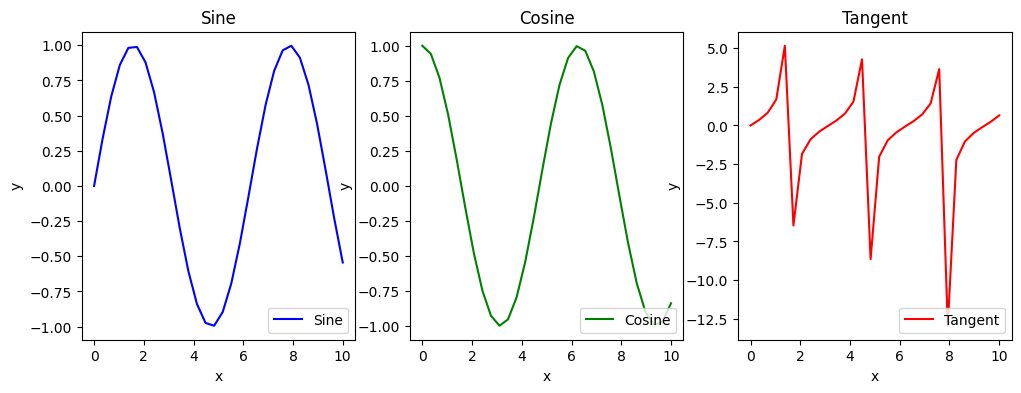

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.linspace(0,10,30)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Setup figure and axes 
fig, ax = plt.subplots(1,3,figsize=(12,4))
 
# Plot lines
ax[0].plot(x,y1, color='b')
ax[1].plot(x,y2, color='g')
ax[2].plot(x,y3, color='r')

# Set labels and titles
ax[0].set_title('Sine')
ax[1].set_title('Cosine')
ax[2].set_title('Tangent')
ax[0].set_xlabel('x')
ax[1].set_xlabel('x')
ax[2].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_ylabel('y')
ax[2].set_ylabel('y')

# Add legend
ax[0].legend(['Sine'], loc='lower right')
ax[1].legend(['Cosine'], loc='lower right')
ax[2].legend(['Tangent'], loc='lower right')

# Show plot
plt.show()

In [62]:
# csv_filename = file_name[:-4] + ".csv"

# combined_cms_df.to_csv(csv_filename)
# # 

# from google.colab import files
# files.download(csv_filename )

# print("Downloading ", csv_filename , " of shape ", combined_cms_df.shape)

In [63]:
# df = pd.DataFrame(sum(var)/len(var), columns=["Values"]) 
# # print(df)

# df.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# (df.sort_values(by="Values", ascending=False)[0:20])


# df_sorted = df.sort_values(by="Values", ascending=False)[10:]  #the top 10 are usually diagonal


# df_sorted.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# import math

# print("On average...")
# print("Num 1 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[0])/10), " as a ", df_sorted["Values"].index[0]%10, "  (", (df_sorted["Values"].values[0]), " times)" )
# print("Num 2 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[1])/10), " as a ", df_sorted["Values"].index[1]%10, "  (", (df_sorted["Values"].values[1]), " times)" )
# print("Num 3 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[2])/10), " as a ", df_sorted["Values"].index[2]%10, "  (", (df_sorted["Values"].values[2]), " times)" )




In [64]:
# df_percents = pd.DataFrame( ((sum(var)*100/len(var)).reshape((10,10))/truth_num_per_category).reshape((100)), columns = ["Values"])


# df_sorted_percents = df_percents.sort_values(by="Values", ascending=False)[10:]  #the top 10 are usually diagonal

# df_sorted_percents.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# print("On average .. ")
# print("Num 1 percent misclassifications", math.floor((df_sorted_percents["Values"].index[0])/10), " as ", df_sorted_percents["Values"].index[0]%10, (df_sorted_percents["Values"].values[0]), " percent" )
# print("Num 2 percent misclassifications", math.floor((df_sorted_percents["Values"].index[1])/10), " as ", df_sorted_percents["Values"].index[1]%10,  (df_sorted_percents["Values"].values[1]), " percent" )
# print("Num 3 percent misclassifications", math.floor((df_sorted_percents["Values"].index[2])/10), " as ", df_sorted_percents["Values"].index[2]%10, (df_sorted_percents["Values"].values[2]), " percent" )







First column name  | Second column name 
-------------------|------------------
Row 1, Col 1       | Row 1, Col 2 
Row 2, Col 1       | Row 2, Col 2 